In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('/content/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#Univariate analysis

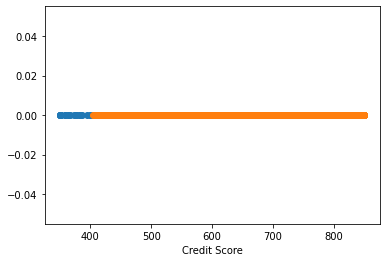

In [ ]:
df_exited = df.loc[df['Exited']==1]
df_notexited = df.loc[df['Exited']==0]
plt.plot(df_exited['CreditScore'],np.zeros_like(df_exited['CreditScore']),'o')
plt.plot(df_notexited['CreditScore'],np.zeros_like(df_notexited['CreditScore']),'o')
plt.xlabel('Credit Score')
plt.show()

# Bivariate analysis

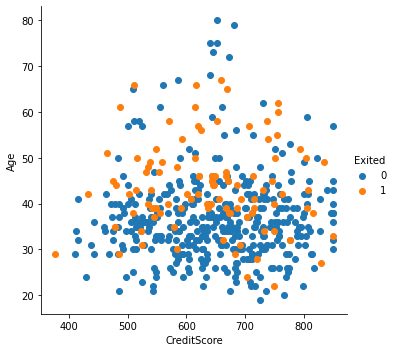

In [ ]:
df_temp = df[:500]
sns.FacetGrid(df_temp,hue='Exited',height=5).map(plt.scatter,"CreditScore","Age").add_legend();
plt.show()

# Multivariate analysis

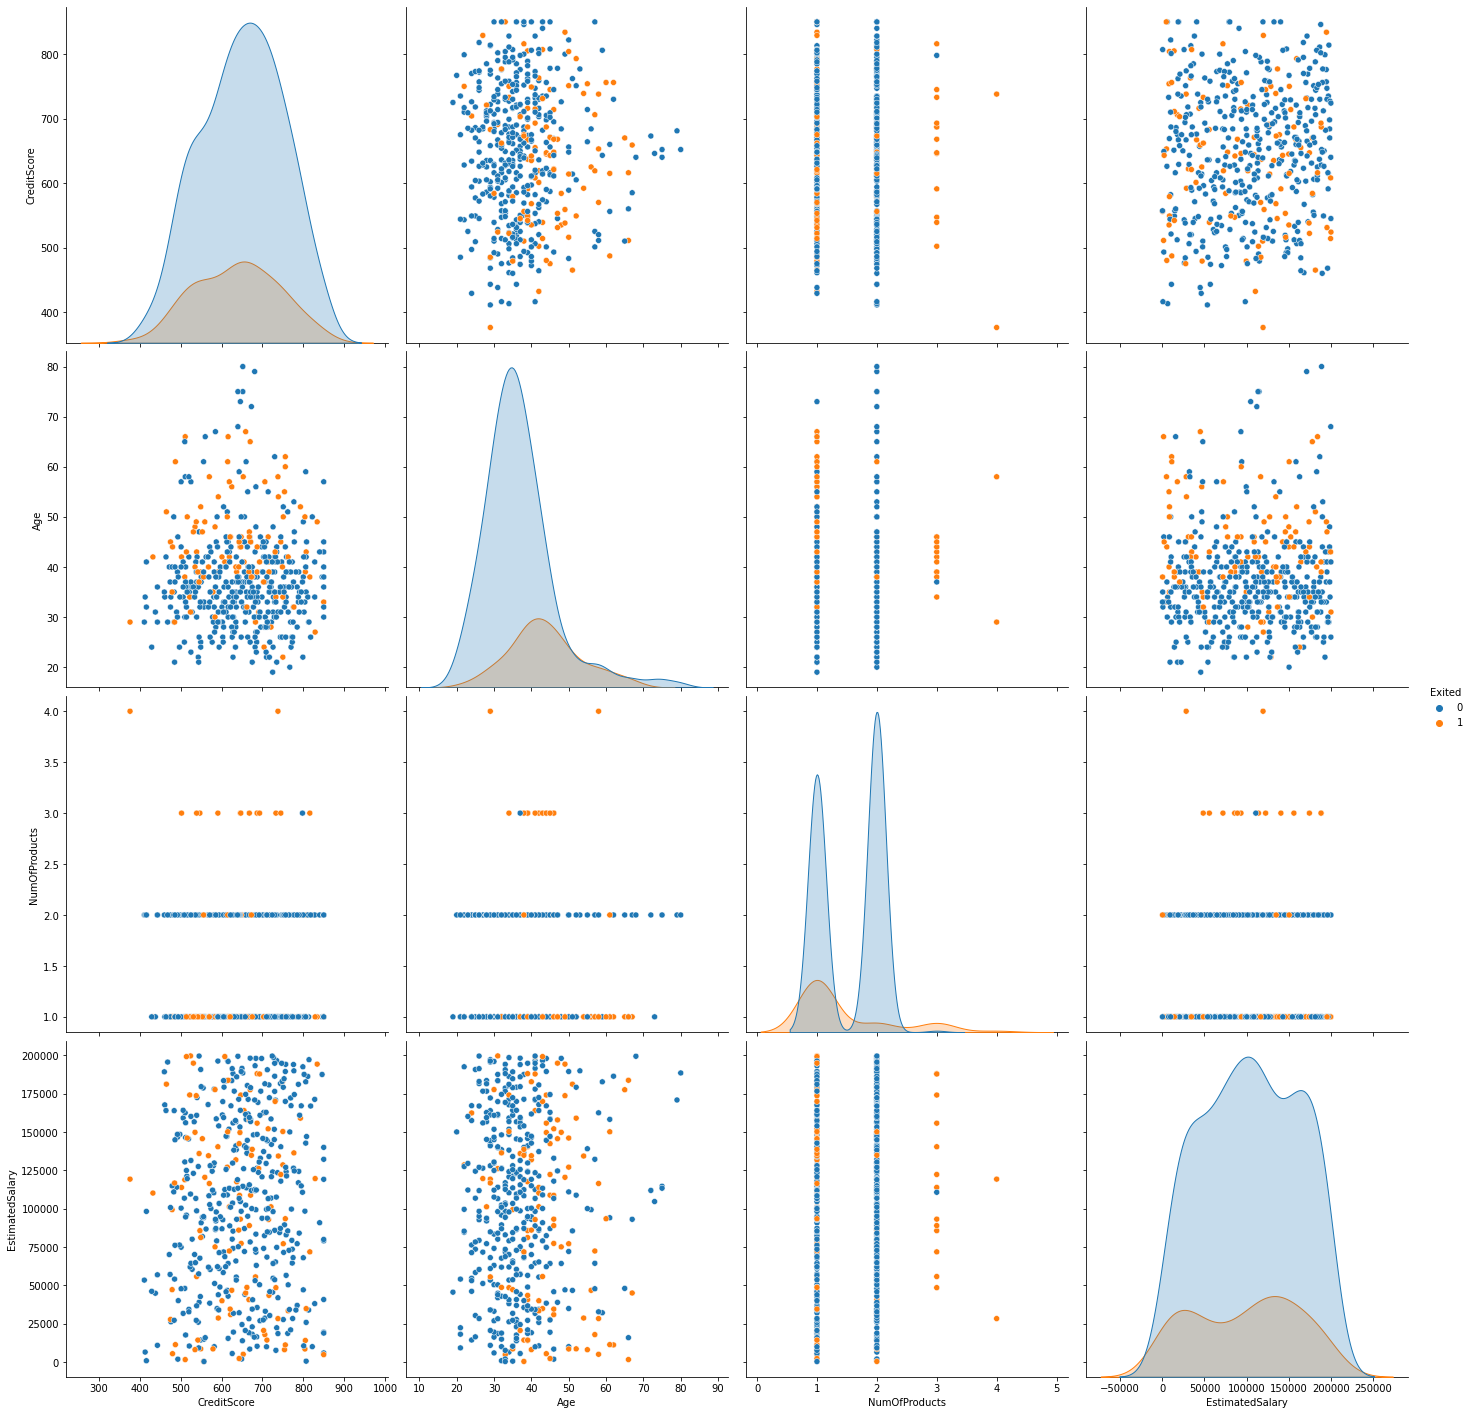

In [ ]:
df_mult = df_temp[['CreditScore','Geography',	'Gender',	'Age','NumOfProducts','EstimatedSalary','Exited']]
sns.pairplot(df_mult,hue="Exited",height=5)

# Handling missing values

In [ ]:
# df.isnull().sum()
# df['Age']=df['Age'].fillna(df['Age'].mode()[0])

# Outliers

skewness value of CreditScore:  1.0113202630234552


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
85,86,15805254,Ndukaku,652,Spain,Female,75,10,0.00,2,1,1,114675.75,0
158,159,15589975,Maclean,646,France,Female,73,6,97259.25,1,0,1,104719.66,0
230,231,15808473,Ringrose,673,France,Male,72,1,0.00,2,0,1,111981.19,0
252,253,15793726,Matveyeva,681,France,Female,79,0,0.00,2,0,1,170968.99,0
310,311,15712287,Pokrovskii,652,France,Female,80,4,0.00,2,1,1,188603.07,0


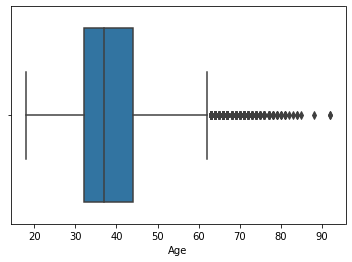

In [ ]:
#visulization 
sns.boxplot(df["Age"],data=df)
print('skewness value of CreditScore: ',df['Age'].skew())
#finding
age_mean =  df['Age'].mean()
age_std = df['Age'].std()
low = age_mean - (3*age_std)
high = age_mean + (3*age_std)
outliers = df[(df['Age']<low) | (df['Age']>high)]
outliers.head()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


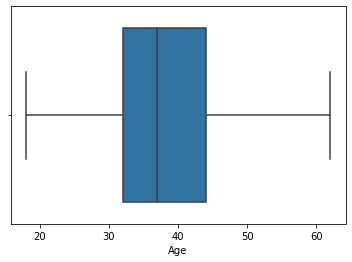

In [ ]:
#flooring and cappong
q1 = df['Age'].quantile(0.25)
q2 = df['Age'].quantile(0.75)
iqr= q2-q1
wwidth = 1.5
l_w  = q1 - (wwidth*iqr)
u_w  = q2 + (wwidth*iqr)
df['Age'] = np.where(df['Age']>u_w,u_w,np.where(df['Age']<l_w,l_w,df['Age']))
sns.boxplot(df["Age"],data=df)

In [ ]:
#categorial and encoding
one_hot_encoding = pd.get_dummies(df, columns = ['HasCrCard','Exited'])
# print(one_hot_encoding)
#label encoding
label_encoder = preprocessing.LabelEncoder()
df['NumOfProducts'] = label_encoder.fit_transform(df['NumOfProducts'])
df['NumOfProducts'].unique()

array([0, 2, 1, 3])

In [ ]:
#split data into dependent and independent variables
# df_independent = 
x = df.iloc[:,:-1]
x = x.drop(['Surname','Geography','Gender'],axis=1)
y = df.iloc[:,13:14]
print(x)
#train test
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=20,test_size=0.2,shuffle=True)


      RowNumber  CustomerId  CreditScore   Age  Tenure    Balance  \
0             1    15634602          619  42.0       2       0.00   
1             2    15647311          608  41.0       1   83807.86   
2             3    15619304          502  42.0       8  159660.80   
3             4    15701354          699  39.0       1       0.00   
4             5    15737888          850  43.0       2  125510.82   
...         ...         ...          ...   ...     ...        ...   
9995       9996    15606229          771  39.0       5       0.00   
9996       9997    15569892          516  35.0      10   57369.61   
9997       9998    15584532          709  36.0       7       0.00   
9998       9999    15682355          772  42.0       3   75075.31   
9999      10000    15628319          792  28.0       4  130142.79   

      NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  
0                 0          1               1        101348.88  
1                 0          0         

In [1]:
#descriptive statistics
print(y.mean())
print(y.median())
print(y.mode())

NameError: ignored